In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\\ARYAN\\PROJECTS\\price prediction\\Housing Price data set.csv')
data=data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'],axis=1)
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()

data.head()

C:\Users\Personal\AppData\Local\Temp\ipykernel_9976\1520302224.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean = data.mean()[0]
C:\Users\Personal\AppData\Local\Temp\ipykernel_9976\1520302224.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stddev = data.std()[0]


,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [3]:
 data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
split_ratio = 0.9
split = int(split_ratio * X.shape[0])
X_test = X[split+1:,:]
X_train = X[:split+1, :]
Y_test = Y[split+1:,:]
Y_train = Y[:split+1, :]

In [4]:
# helper Functions
def computeCost(X,y,theta,lam):
    tobesummed = np.power(((X.dot(theta.T))-y),2)+lam*np.sum(np.power(theta,2))
    return np.sum(tobesummed)/(2 * len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error /= len(actual)
    return error[0]

def plotGraph(x,y,labelX='X',labelY='Y',title='X vs Y'):
  fig, ax = plt.subplots()  
  ax.plot(x, y, 'r')
  ax.set_xlabel(labelX) 
  ax.set_ylabel(labelY)  
  ax.set_title(title)

In [5]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha, lam):
    lam_matrix = lam * np.ones(theta.shape)
    lam_matrix[0][0] = 0
    for i in range(iters):
        theta = theta*(1- lam_matrix / len(X)) - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)

    return theta

In [6]:
#Normal equation
def normalEquation(X,Y,lam):
    lam_matrix = lam * np.identity(X.shape[1])
    lam_matrix[0][0] = 0
    theta = np.linalg.inv(X.T.dot(X) + lam_matrix).dot(X.T).dot(Y)
    return theta
    

min Error  :  13.960611355440056 %
Optimal Lambda :  24


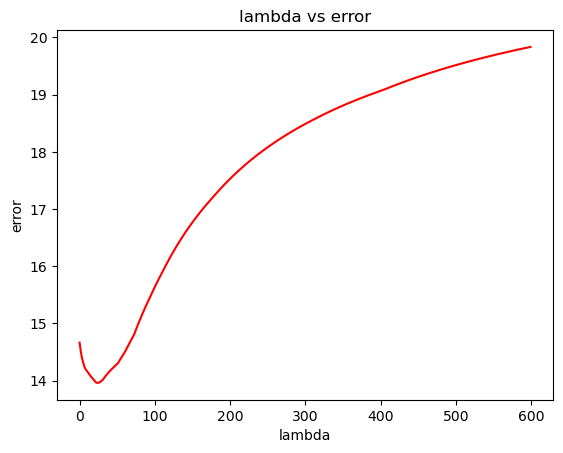

In [7]:
theta = np.zeros([1,X.shape[1]])
alpha = .1 #learning rate
iters = 500 #epoch
error_matrix = []
lam_range = 600 #maximam lamda
for lam in range(lam_range):
    g = gradientDescent(X_train,Y_train,theta,iters,alpha, lam)
    Cost = computeCost(X_train,Y_train,g,lam)

    Y_pred = X_test.dot(g.T)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_matrix.append(error*100)
optimal_lambda = 0
min_error = 9999
for i in range(len(error_matrix)):
    if error_matrix[i] < min_error:
        optimal_lambda = i
        min_error = error_matrix[i]

print("min Error  : ", (min_error),'%')
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_matrix,'lambda','error','lambda vs error')

In [8]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2][0]))

pred price = 64257.57664950318 actual price = 58500.0


min Error :  13.432288061521586
Optimal Lambda :  311


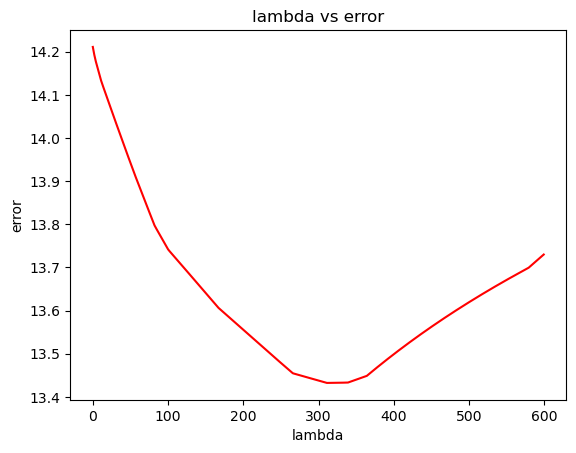

In [9]:
error_mat = []
lam_range = 600

for lam in range(lam_range):
    theta = normalEquation(X,Y,lam)
    Cost = computeCost(X_train,Y_train,theta.T,lam)
    Y_pred = X_test.dot(theta)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_mat.append(error*100)

optimal_lambda = 0
min_error = 9999
for i in range(len(error_mat)):
    if error_mat[i] < min_error:
        optimal_lambda = i
        min_error = error_mat[i]
print("min Error : ", min_error)
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_mat,'lambda','error','lambda vs error')

In [10]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2])[0])

pred price = 57100.42631724469 actual price = 58500.0
